# autocorrelation plot on level and first difference

In [1]:
start_date = '2009-01-31' #'1990-01-31' # '2009-01-31'
import nb_credit_spread as cslibrary
cslib = cslibrary.creditspread()

In [2]:
def plot_series(timeseries, window = 12, cutoff = 0.01):
    import numpy as np
    import pandas as pd
    from statsmodels.tsa.stattools import adfuller
    %matplotlib inline
    import matplotlib.pyplot as plt
    import seaborn as sns

    sns.set()

    #Determine rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    # plt.show()
    return fig

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

ytw = cslib.get_ytw_from_date(start=start_date)

print(ytw.shape)
column = 'CS-Aaa-3MO'
# sns.lineplot(x=ytw.index, y=column,legend='full', data=ytw)


(127, 28)


# show series plot, ACF and PACF

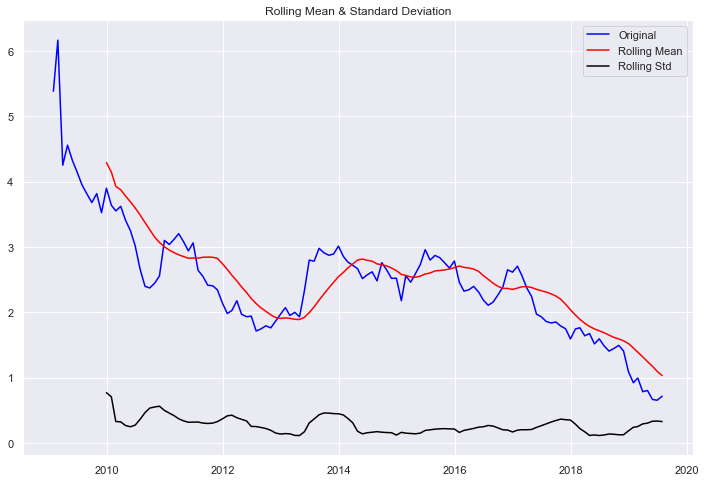

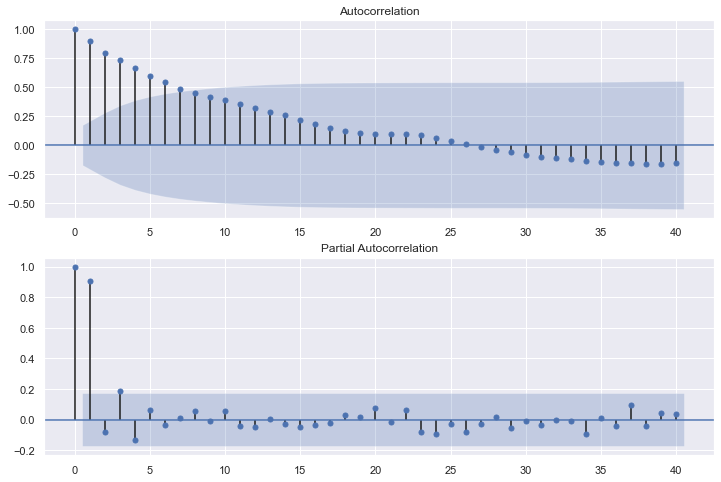

In [4]:
'''
show series plot, ACF and PACF
'''
import statsmodels.api as sm

plot_series(ytw[column]).show()

df = ytw[[column]]
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df, lags=40, ax=ax2)# , lags=40

# show first difference series plot, ACF and PACF

(126, 1)


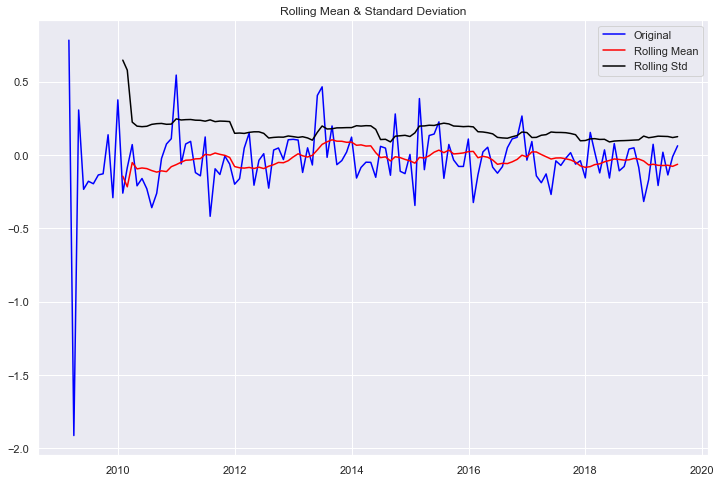

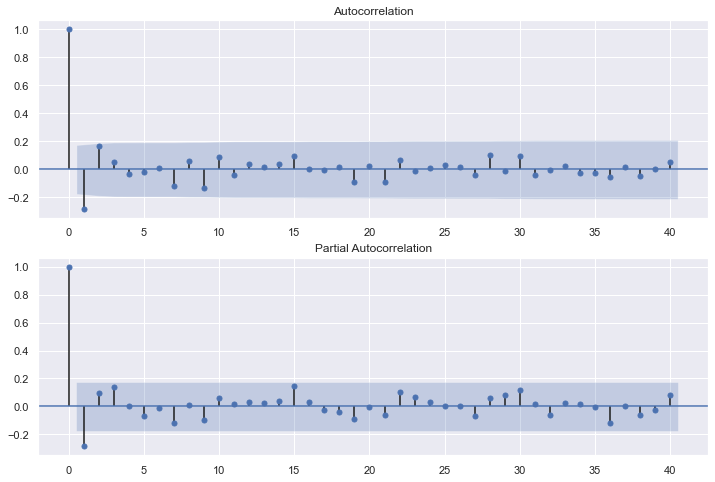

In [5]:
fdiff = ytw[[column]].diff(periods=1).dropna()

plot_series(fdiff[column]).show()

print(fdiff.shape)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(fdiff, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(fdiff, lags=40, ax=ax2)# , lags=40